In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import os
import sys
from pathlib import Path

# Ensure repo root is on sys.path so 'src' package imports work when the notebook's CWD is src/classification
REPO_ROOT = Path.cwd().resolve().parents[1]
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

from src.data_generation.wagon_data_generation.fleet_manager import FleetManager


# -----------------------
# Global Simulation Config
# -----------------------
OUTPUT_DIR = "../../data/wagon_data"
MEASUREMENTS_OUTPUT_DIR = f"{OUTPUT_DIR}/measurements"
METADATA_OUTPUT_DIR = f"{OUTPUT_DIR}/metadata"
FAILURES_OUTPUT_DIR = f"{OUTPUT_DIR}/failures"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(MEASUREMENTS_OUTPUT_DIR, exist_ok=True)
os.makedirs(METADATA_OUTPUT_DIR, exist_ok=True)
os.makedirs(FAILURES_OUTPUT_DIR, exist_ok=True)

WAGON_TYPES = ["Boxcar", "Flatcar", "Tank Car", "Hopper", "Refrigerator Car", "Gondola"]
STATUS_OPTIONS = ["In Service", "Under Maintenance", "Decommissioned", "Reserved"]

# Base failure rates per wagon type
BASE_FAILURE_RATES = {
    "Boxcar": 0.0005,
    "Flatcar": 0.0006,
    "Tank Car": 0.0010,
    "Hopper": 0.0007,
    "Refrigerator Car": 0.0012,
    "Gondola": 0.0008,
}

# Failure causes per type
FAILURE_CAUSES = {
    "Boxcar": ["Brake Failure", "Axle Overheating", "Door Jam"],
    "Flatcar": ["Coupling Issue", "Brake Failure", "Axle Overheating"],
    "Tank Car": ["Leak Detected", "Brake Failure", "Sensor Malfunction"],
    "Hopper": ["Hatch Blockage", "Brake Failure", "Overheating Bearings"],
    "Refrigerator Car": ["Cooling System Fault", "Door Jam", "Brake Failure"],
    "Gondola": ["Structural Crack", "Brake Failure", "Axle Overheating"],
}

manager = FleetManager(
    failure_rates=BASE_FAILURE_RATES,
    failure_causes=FAILURE_CAUSES,
    wagon_types=WAGON_TYPES,
    sensor_output_dir=MEASUREMENTS_OUTPUT_DIR,
    metadata_output_dir=METADATA_OUTPUT_DIR,
    failure_output_dir=FAILURES_OUTPUT_DIR,
    num_wagons=100,
)
manager.generate_fleet()
print(f"number of future failures: {manager.get_future_failures().shape[0]}")

number of future failures: 10


In [ ]:
manager.save_metadata_one_file(file_type="NDJSON")
manager.save_historical_failure_results(file_type="CSV", one_file=True)
manager.save_future_failures_results(file_type="CSV", path="../../data/wagon_data/")
manager.save_historical_simulation_results(file_type="PARQUET")

In [20]:
manager.get_all_failures()

,timestamp,repair_time,downtime,cause,id
0,2022-10-27,2022-10-27 22:00:00,0 days 22:00:00,cooling failure,WGN-22477
1,2023-12-23,2023-12-23 04:00:00,0 days 04:00:00,cooling failure,WGN-22477
2,2024-01-26,2024-01-26 03:00:00,0 days 03:00:00,cooling failure,WGN-22477
3,2024-10-15,2024-10-15 14:00:00,0 days 14:00:00,cooling failure,WGN-22477
4,2025-03-21,2025-03-21 07:00:00,0 days 07:00:00,battery failure,WGN-22477
...,...,...,...,...,...
404,2024-09-27,2024-09-27 20:00:00,0 days 20:00:00,cooling failure,WGN-53799
405,2024-10-21,2024-10-21 06:00:00,0 days 06:00:00,brakes failure,WGN-53799
406,2025-05-29,2025-05-29 08:00:00,0 days 08:00:00,battery failure,WGN-53799
407,2025-07-10,2025-07-10 17:00:00,0 days 17:00:00,cooling failure,WGN-53799


In [21]:
import pandas as pd


all_failures = manager.get_all_failures()
failures_from_60_to_30_days_ago = all_failures[
    (all_failures['timestamp'] >= pd.Timestamp.now() - pd.Timedelta(days=60)) &
    (all_failures['timestamp'] < pd.Timestamp.now() - pd.Timedelta(days=30))
]
failures_from_60_to_30_days_ago

,timestamp,repair_time,downtime,cause,id
6,2025-07-26,2025-07-26 22:00:00,0 days 22:00:00,cooling failure,WGN-22477
21,2025-07-24,2025-07-24 17:00:00,0 days 17:00:00,battery failure,WGN-37611
44,2025-07-12,2025-07-12 10:00:00,0 days 10:00:00,brakes failure,WGN-44982
91,2025-07-28,2025-07-28 21:00:00,0 days 21:00:00,battery failure,WGN-26650
173,2025-07-25,2025-07-26 00:00:00,1 days 00:00:00,axle failure,WGN-97252
269,2025-07-20,2025-07-20 12:00:00,0 days 12:00:00,cooling failure,WGN-39103
351,2025-07-04,2025-07-04 05:00:00,0 days 05:00:00,brakes failure,WGN-17692
407,2025-07-10,2025-07-10 17:00:00,0 days 17:00:00,cooling failure,WGN-53799


In [ ]:
# manager.save_historical_failure_results(file_type="csv", one_file=True)

KeyError: 'timestamp'

In [3]:
manager.get_all_failures()

,failure_timestamp,repair_time,downtime,cause,id
0,2025-03-14,2025-03-14 04:00:00,0 days 04:00:00,cooling failure,WGN-41764
1,2025-06-25,2025-06-25 20:00:00,0 days 20:00:00,brakes failure,WGN-41764
2,2023-09-24,2023-09-24 21:00:00,0 days 21:00:00,brakes failure,WGN-41276
3,2023-10-06,2023-10-06 15:00:00,0 days 15:00:00,cooling failure,WGN-41276
4,2025-07-13,2025-07-13 10:00:00,0 days 10:00:00,battery failure,WGN-41276
5,2021-07-20,2021-07-20 19:00:00,0 days 19:00:00,cooling failure,WGN-66825
6,2021-08-07,2021-08-07 18:00:00,0 days 18:00:00,brakes failure,WGN-66825
7,2022-07-06,2022-07-06 06:00:00,0 days 06:00:00,cooling failure,WGN-66825
8,2023-04-17,2023-04-17 04:00:00,0 days 04:00:00,cooling failure,WGN-66825
9,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,brakes failure,WGN-66825


In [4]:
manager.simulators[0].write_sensor_data("sensors.csv", "csv")

In [26]:
all_data = manager.get_historic_fleet_training_data()

In [27]:
all_data[all_data["failure"] == 1.0]

,timestamp,speed,brake,temp,vibration,battery,id,failure
110,2022-10-27,0.0,8.339832,71.208630,11.350944,80.898826,WGN-22477,1.0
532,2023-12-23,0.0,7.272593,79.635465,9.660996,60.806768,WGN-22477,1.0
566,2024-01-26,0.0,8.384286,70.268748,11.183153,57.681154,WGN-22477,1.0
829,2024-10-15,0.0,8.298472,71.495813,8.909470,45.653985,WGN-22477,1.0
986,2025-03-21,0.0,8.140072,80.618028,10.313193,37.940795,WGN-22477,1.0
...,...,...,...,...,...,...,...,...
112154,2024-09-27,0.0,7.901464,81.681352,10.050319,69.988645,WGN-53799,1.0
112178,2024-10-21,0.0,7.288463,81.125641,8.049491,70.927741,WGN-53799,1.0
112398,2025-05-29,0.0,8.425842,81.381711,8.723672,58.306565,WGN-53799,1.0
112440,2025-07-10,0.0,8.007158,79.501752,9.462776,97.285530,WGN-53799,1.0


In [28]:
training_data = all_data.drop("timestamp", axis=1)

In [ ]:
from pycaret.classification import setup, compare_models, plot_model

clf = setup(data=training_data, target="failure")

best = compare_models(sort="Recall")  # Sort models by recall
plot_model(best, plot="confusion_matrix")

,Description,Value
0,Session id,3259
1,Target,failure
2,Target type,Binary
3,Original data shape,"(109973, 7)"
4,Transformed data shape,"(109973, 7)"
5,Transformed train set shape,"(76981, 7)"
6,Transformed test set shape,"(32992, 7)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:17:08
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [8]:
from pycaret.classification import predict_model
import pandas as pd

data_of_the_last_month = all_data[
    all_data["timestamp"] > all_data["timestamp"].max() - pd.Timedelta(days=30)
].drop(["failure", "timestamp"], axis=1)

In [10]:
predict_model(best, data=data_of_the_last_month)

,speed,brake,temp,vibration,battery,prediction_label,prediction_score
1331,31.163898,9.355618,45.359966,9.346098,74.579887,0,1.0
1332,30.093945,9.503006,44.236305,9.164573,74.473030,0,1.0
1333,30.006081,9.211631,44.357224,9.285952,73.455612,0,1.0
1334,30.123470,9.420440,44.960049,9.768115,73.152405,0,1.0
1335,29.775928,9.311604,44.534916,9.284073,73.322189,0,1.0
...,...,...,...,...,...,...,...
104792,45.894081,6.910219,50.752365,5.495576,67.813011,0,1.0
104793,45.200668,6.712153,51.351727,5.807173,66.772728,0,1.0
104794,46.168682,6.857018,51.622906,5.525090,67.000130,0,1.0
104795,45.407196,6.727252,51.233864,5.971472,67.708412,0,1.0


In [11]:
predictions = predict_model(best, data=data_of_the_last_month)["prediction_label"]
failure_predictions = predictions[predictions == 1.0]
len(failure_predictions)

21

In [ ]:
clf = setup(data=training_data, target="failure", session_id=0)

# best_model = compare_models(sort="AUC")

# test_predictions = predict_model(best_model, data=test_data)

,Description,Value
0,Session id,0
1,Target,failure
2,Target type,Binary
3,Original data shape,"(989, 6)"
4,Transformed data shape,"(989, 6)"
5,Transformed train set shape,"(692, 6)"
6,Transformed test set shape,"(297, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [9]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9986,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0350
nb,Naive Bayes,0.9986,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0160
dt,Decision Tree Classifier,0.9986,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0120
ridge,Ridge Classifier,0.9986,0.0500,0.0000,0.0000,0.0000,nan,0.0000,0.0140
rf,Random Forest Classifier,0.9986,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0750
ada,Ada Boost Classifier,0.9986,0.0500,0.0000,0.0000,0.0000,nan,0.0000,0.0140
lda,Linear Discriminant Analysis,0.9986,0.0500,0.0000,0.0000,0.0000,nan,0.0000,0.0110
et,Extra Trees Classifier,0.9986,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0630
lightgbm,Light Gradient Boosting Machine,0.9986,0.0500,0.0000,0.0000,0.0000,nan,0.0000,0.0980
dummy,Dummy Classifier,0.9986,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0170


c:\Apps\repos\neuraltwin\.venv\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


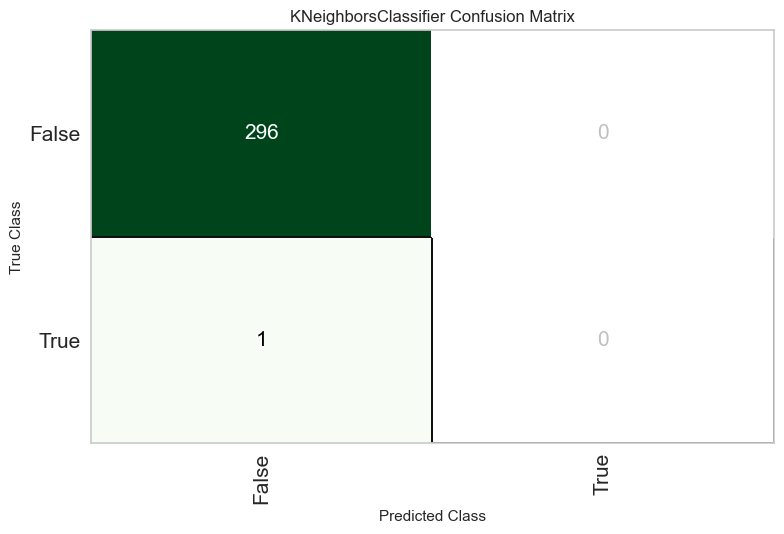

In [11]:
plot_model(best, plot="confusion_matrix")

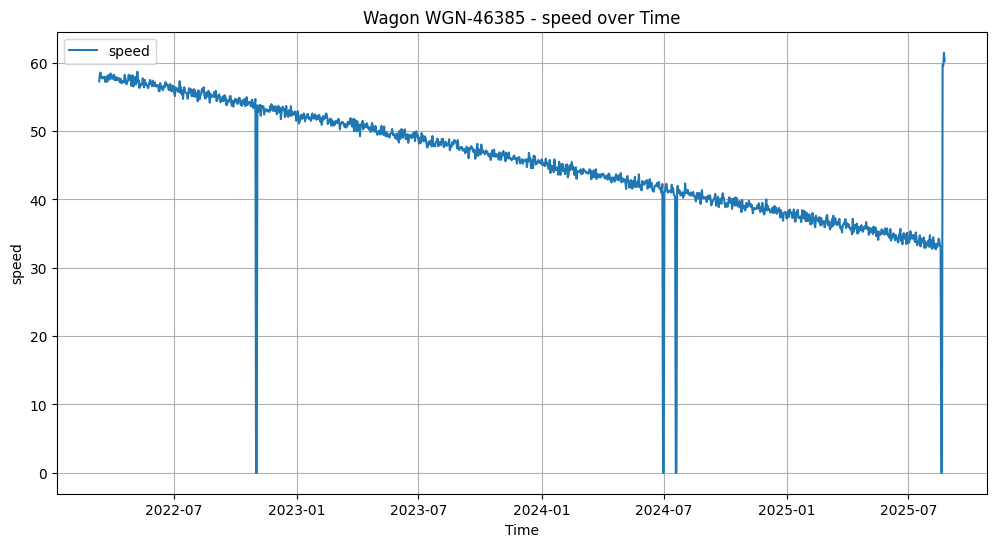

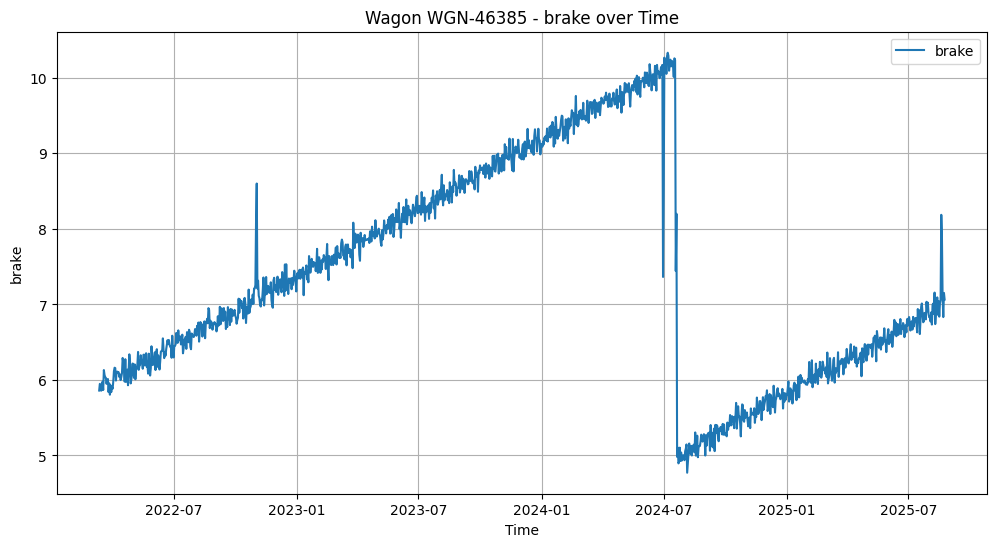

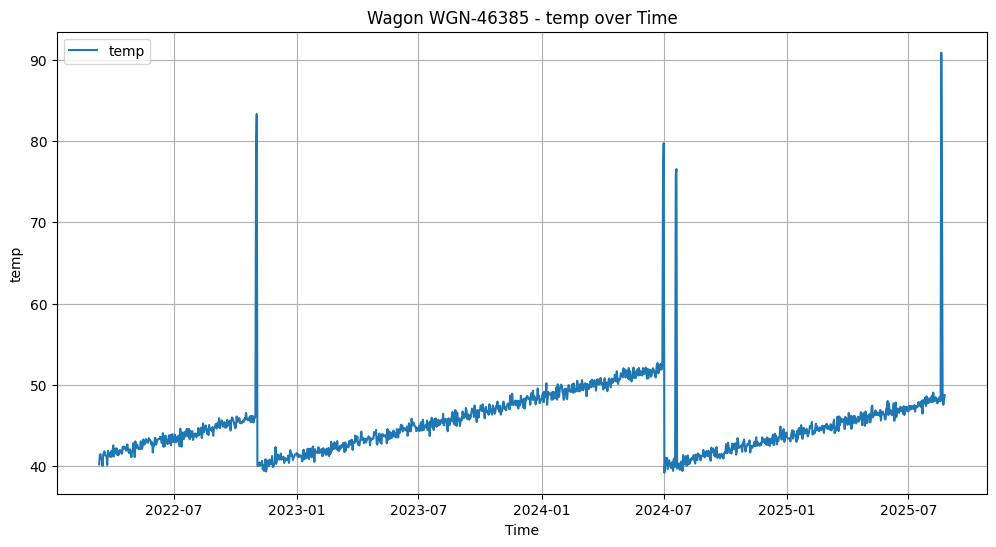

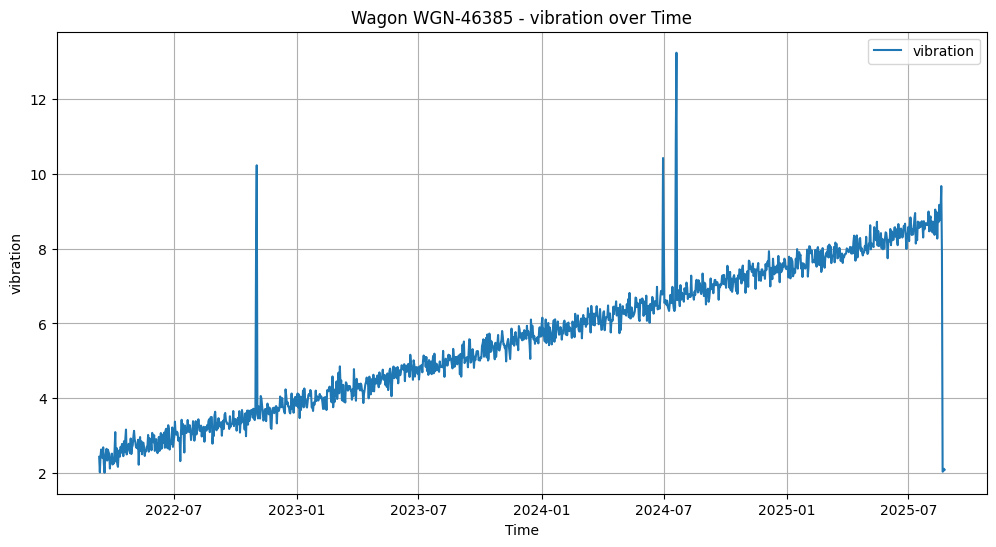

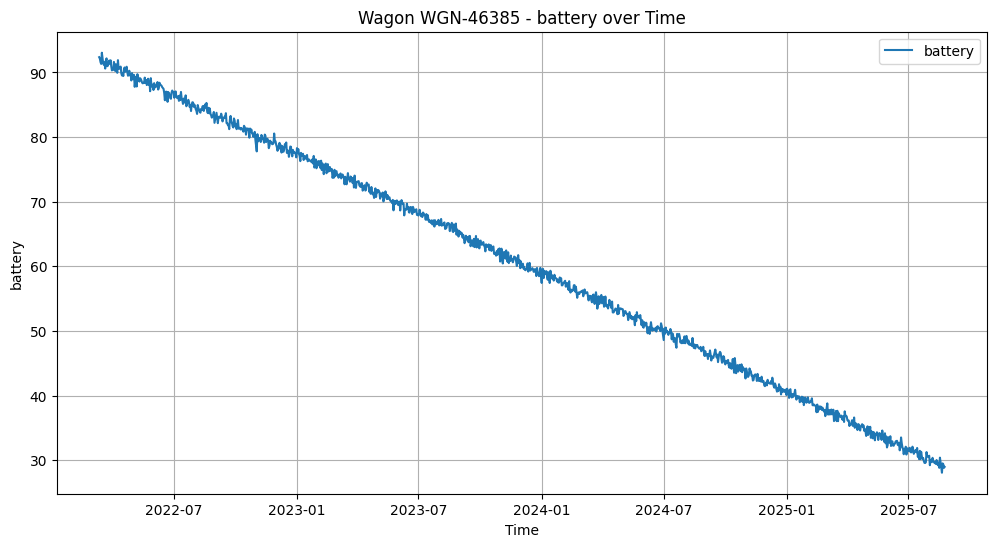

In [ ]:
# plot all variables in manager.simulators[0].results.keys() (except timestamps) w.r.t timestamp
import matplotlib.pyplot as plt

for var in manager.simulators[0].results.keys():
    if var == "timestamp":
        continue
    plt.figure(figsize=(12, 6))
    plt.plot(
        manager.simulators[0].results["timestamp"],
        manager.simulators[0].results[var],
        label=var,
    )
    plt.title(f"Wagon {manager.simulators[0].wagon.get_id()} - {var} over Time")
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()
    plt.grid()
    plt.show()